# Importing Data

In [343]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
%notebook matplotlib
from warnings import filterwarnings
filterwarnings('ignore')

In [344]:
train = pd.read_csv('train.csv')
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [345]:
train.shape

(2000, 21)

**Dataset:** https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [347]:
train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [348]:
test = pd.read_csv('test.csv')
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [349]:
test.shape

(1000, 21)

In [350]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [351]:
test.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

# Exploratory Data Analysis

In [352]:
for i in train.columns:
    print(i,end=': ')
    print('\n',train[i].unique())
    print()

battery_power: 
 [ 842 1021  563 ... 1139 1467  858]

blue: 
 [0 1]

clock_speed: 
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

dual_sim: 
 [0 1]

fc: 
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

four_g: 
 [0 1]

int_memory: 
 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

m_dep: 
 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

mobile_wt: 
 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 

In [353]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

In [354]:
test.drop('id',inplace=True,axis=1)
train_without_target=train.drop('price_range',axis=1)

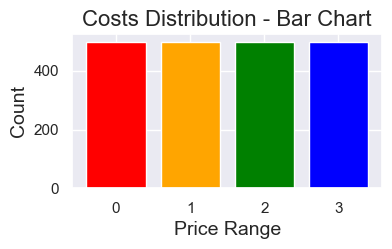

In [355]:
labels = train["price_range"].value_counts().index
sizes = train["price_range"].value_counts()
colors = ['orange', 'green', 'blue', 'red']
plt.figure(figsize=(4, 2))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Costs Distribution - Bar Chart', fontsize=16)
plt.show()

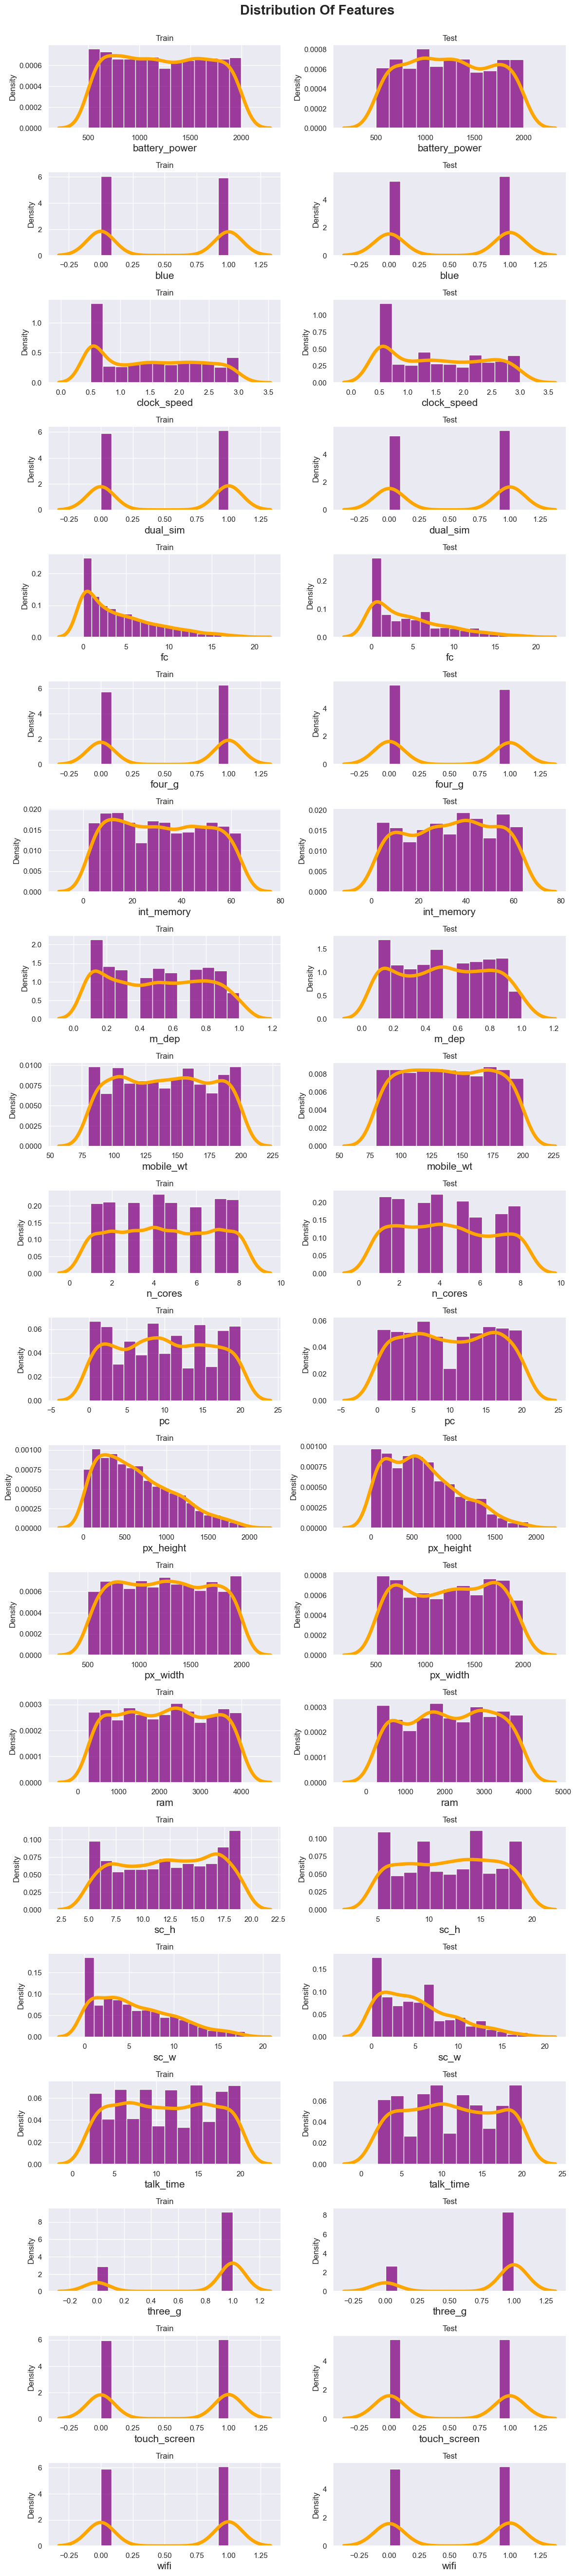

In [356]:
sns.set_style('darkgrid')
plot_color = 'purple'

plt.figure(figsize=(12, 55))

for idx, feature in enumerate(list(train_without_target.columns.values)):
    plt.subplot(21, 2, idx * 2 + 1)
    ax = sns.histplot(x=feature, data=train, color=plot_color, stat="density", common_norm=False)
    sns.kdeplot(x=feature, data=train, color="orange", linewidth=5)
    plt.xlabel(feature, size=15)
    plt.title('Train')
    plt.subplot(21, 2, idx * 2 + 2)
    ax = sns.histplot(x=feature, data=test, color=plot_color, stat="density", common_norm=False)
    sns.kdeplot(x=feature, data=test, color="orange", linewidth=5)
    plt.xlabel(feature, size=15)
    plt.title('Test')
    plt.grid()

plt.suptitle("Distribution Of Features", y=1, x=0.55, size=20, fontweight="bold")
plt.tight_layout()
plt.show()

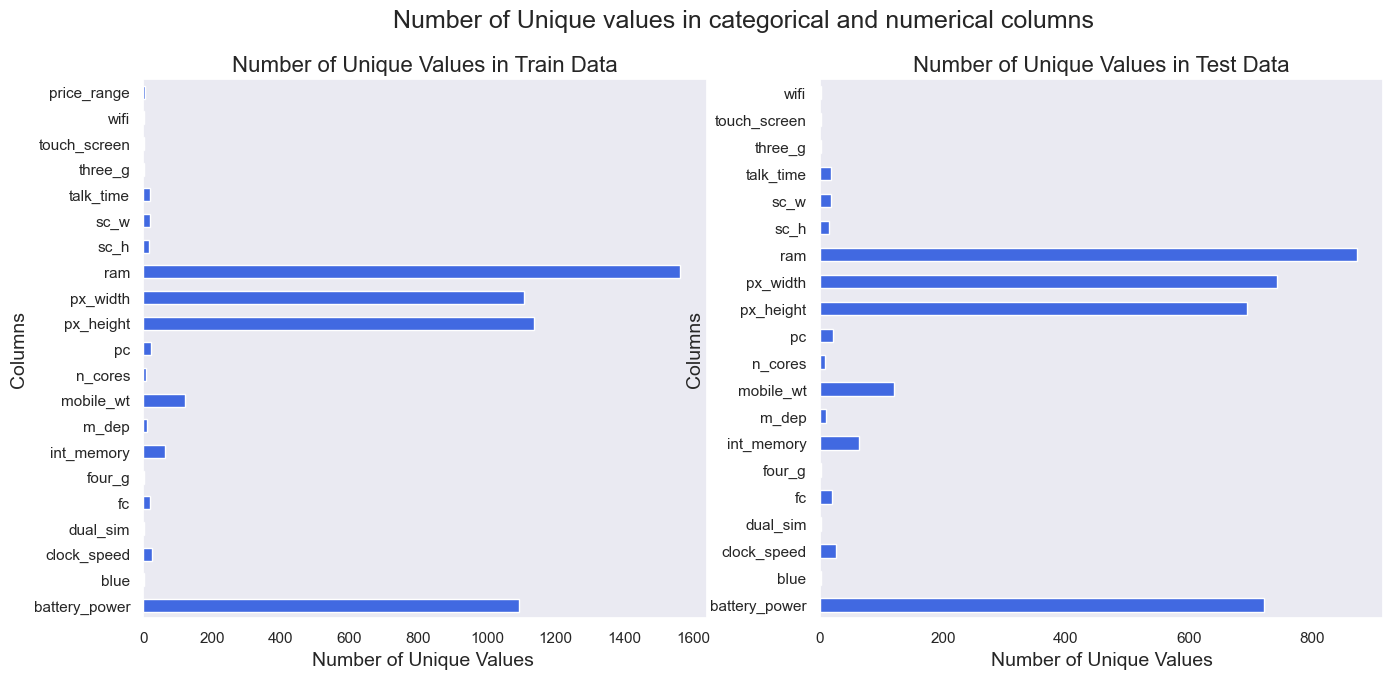

In [357]:
sns.set_style('darkgrid')
color = 'royalblue'

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
train.nunique().plot(kind='barh', ax=ax[0], label='train data', color=color)
ax[0].grid()
ax[0].set_xlabel("Number of Unique Values ", fontsize=14)
ax[0].set_ylabel("Columns", fontsize=14)
ax[0].set_title("Number of Unique Values in Train Data", fontsize=16)

test.nunique().plot(kind='barh', ax=ax[1], label='test data', color=color)
ax[1].grid()
ax[1].set_xlabel("Number of Unique Values", fontsize=14)
ax[1].set_ylabel("Columns", fontsize=14)
ax[1].set_title("Number of Unique Values in Test Data", fontsize=16)

fig.suptitle("Number of Unique values in categorical and numerical columns", fontsize=18)
plt.show()

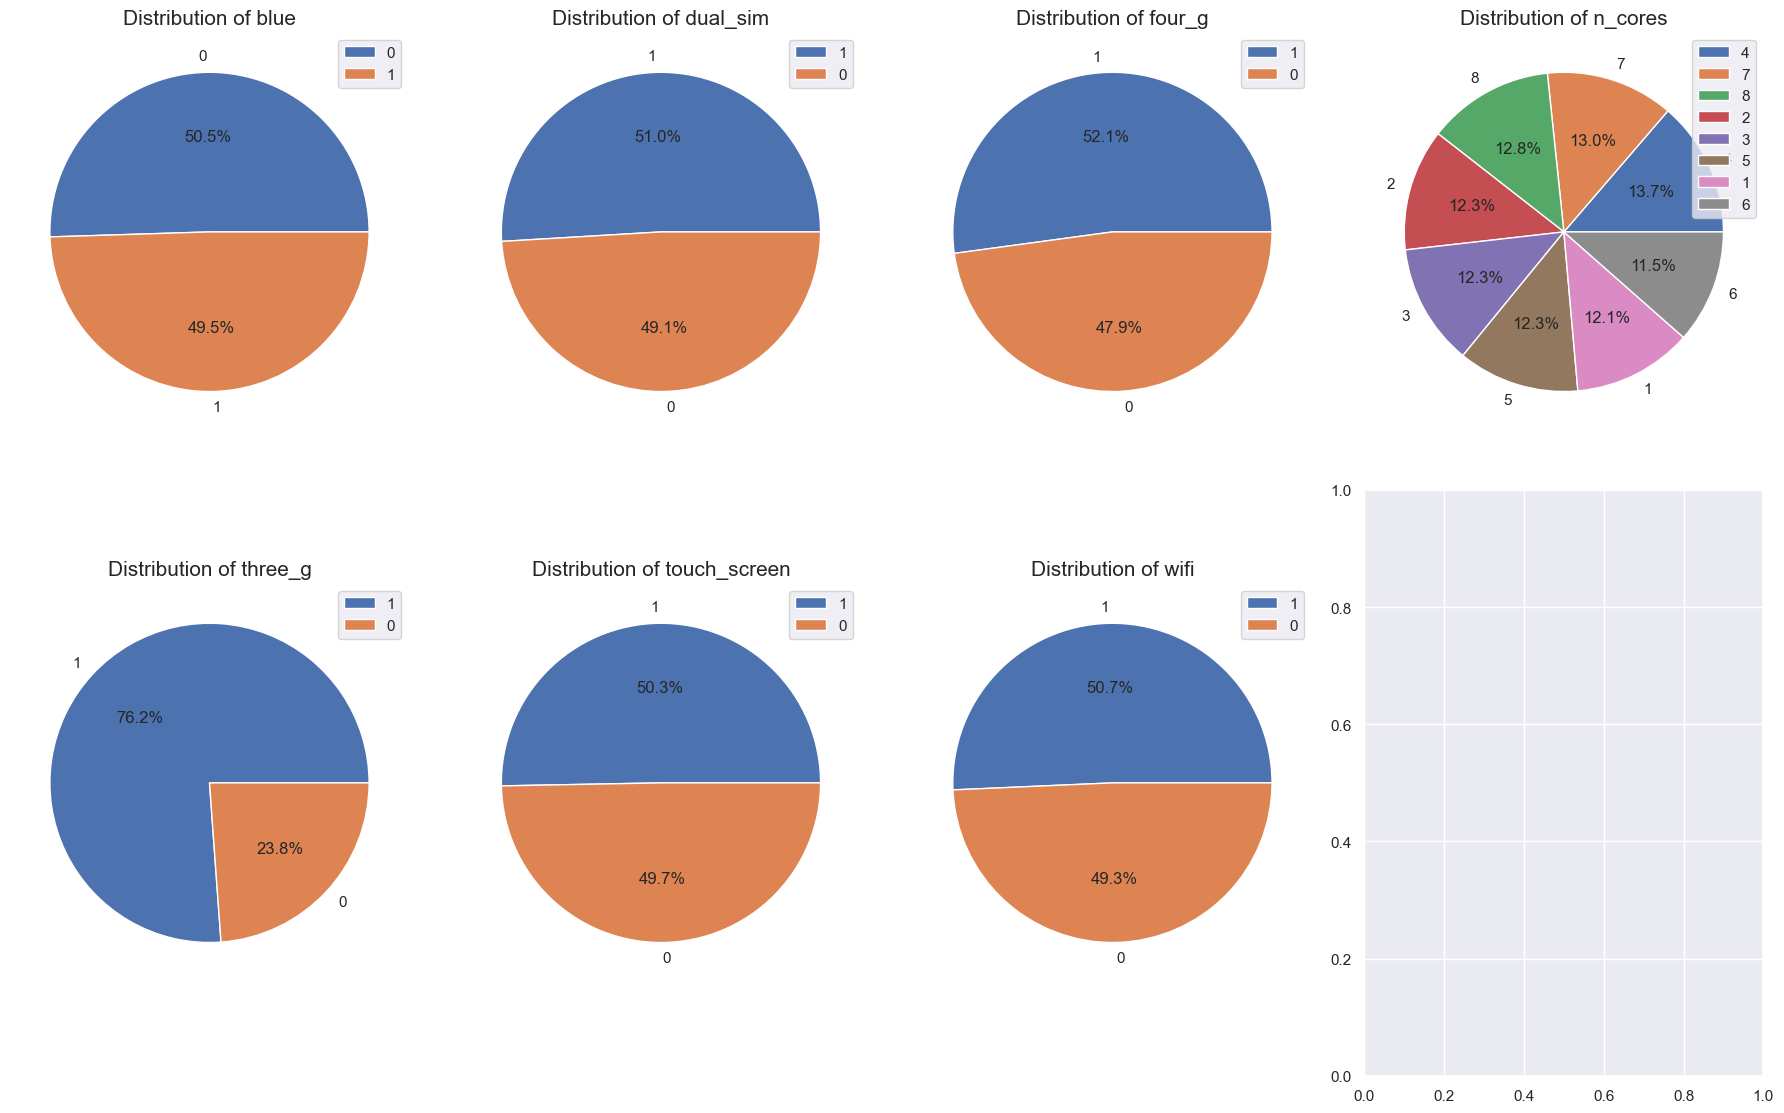

In [358]:
new_train = train.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'Distribution of blue':['no-blue','has blue'],
                  'Distribution of dual_sim':['no-dual-sim','has dual-sim'],
                 'Distribution of four_g':['no-4G','has-4G'],
                 'Distribution of n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'Distribution of three_g':['no-3G','has-3G'],
                 'Distribution of touch_screen':['no-touch','has-touch'],
                 'Distribution of wifi':['no-wifi','has-wifi']})
    
fig, axs = plt.subplots(2, 4, figsize=(18, 12))

for i, c in enumerate(cat_columns):
    row, col = divmod(i, 4)
    ax = axs[row, col]
    ax.pie(new_train[c].value_counts(), labels=list(new_train[c].value_counts().index), autopct='%1.1f%%')
    ax.legend()
    ax.set_title(f'Distribution of {c}', fontsize=15)

plt.tight_layout()
plt.show()    

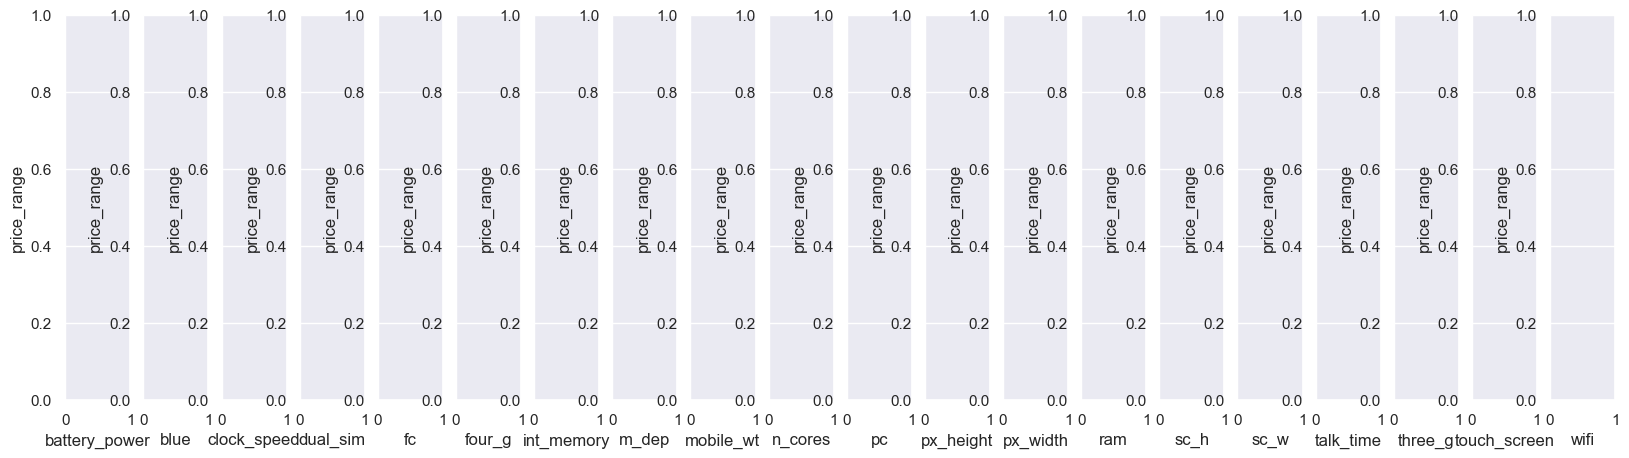

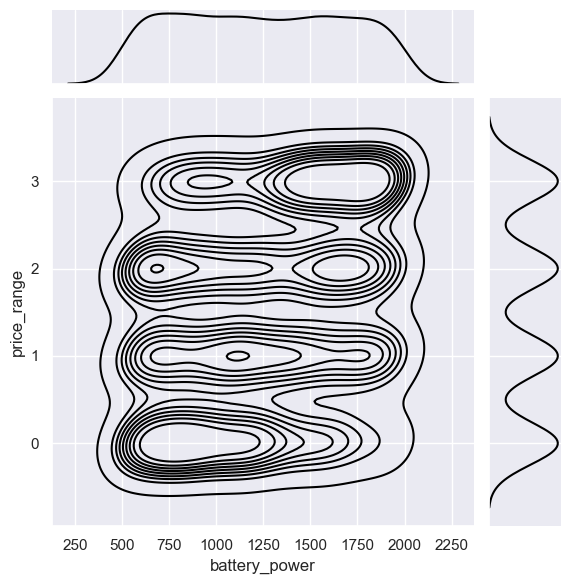

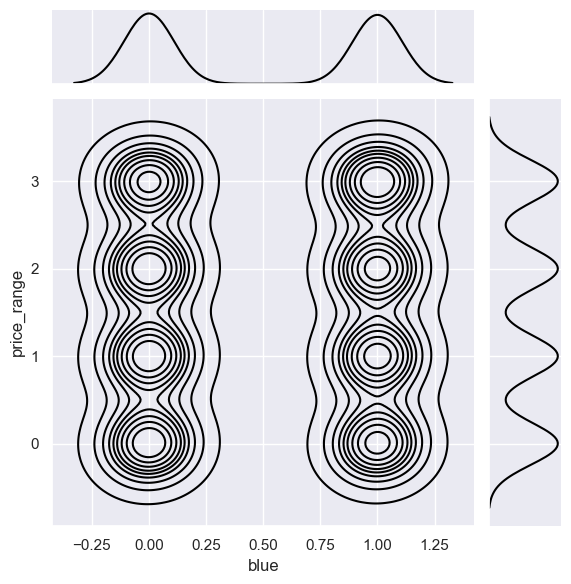

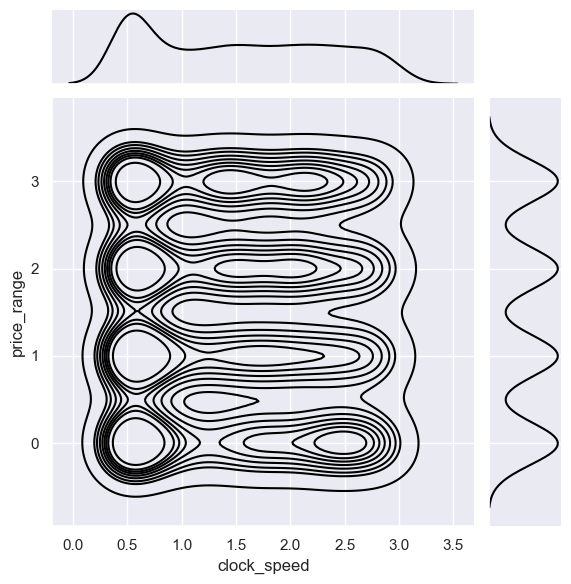

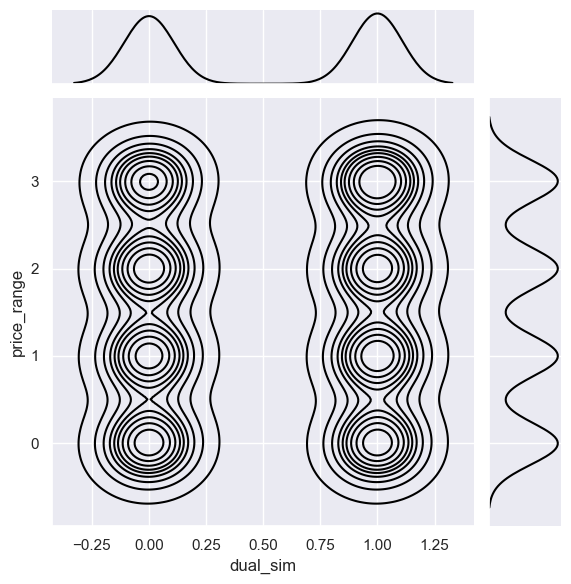

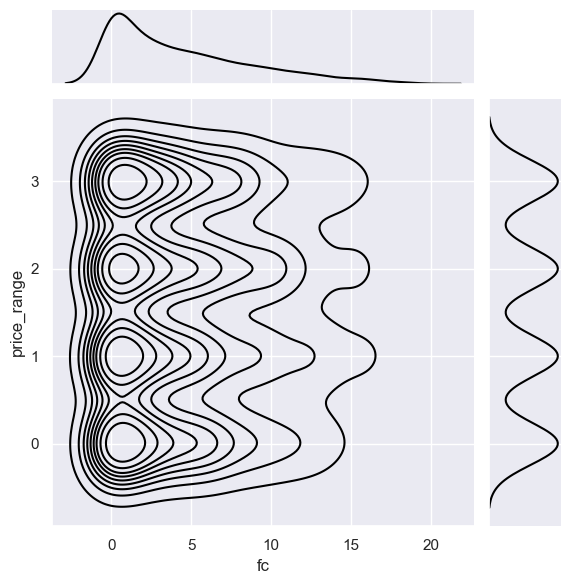

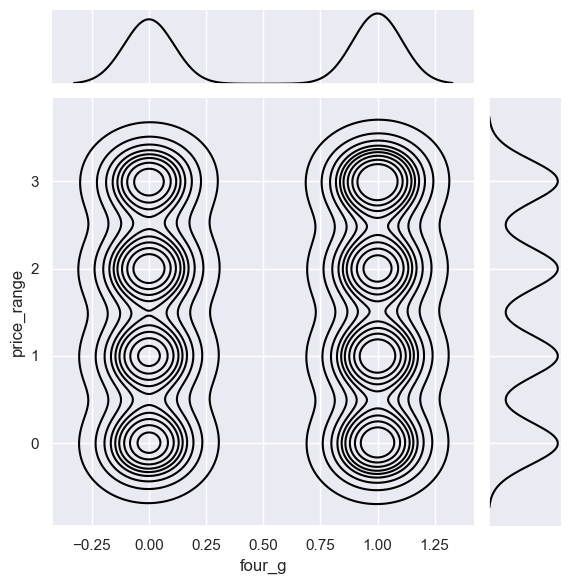

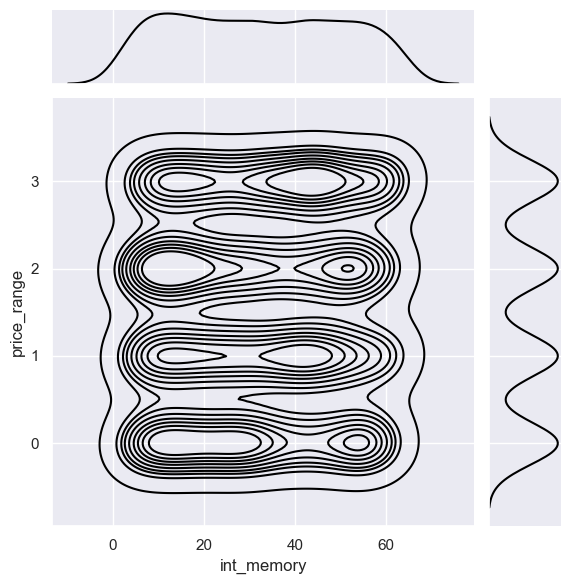

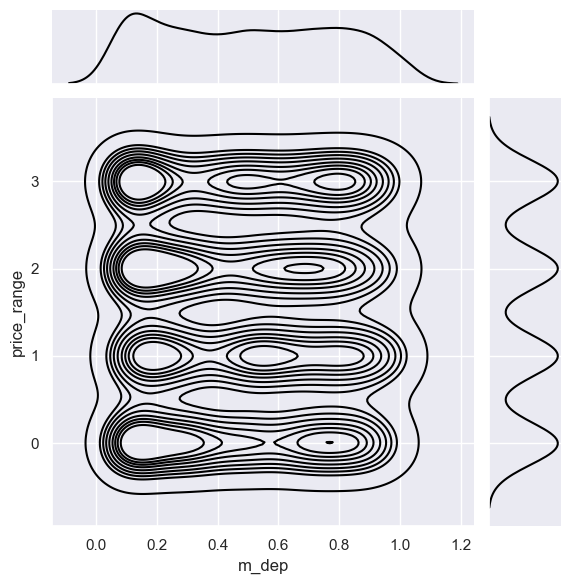

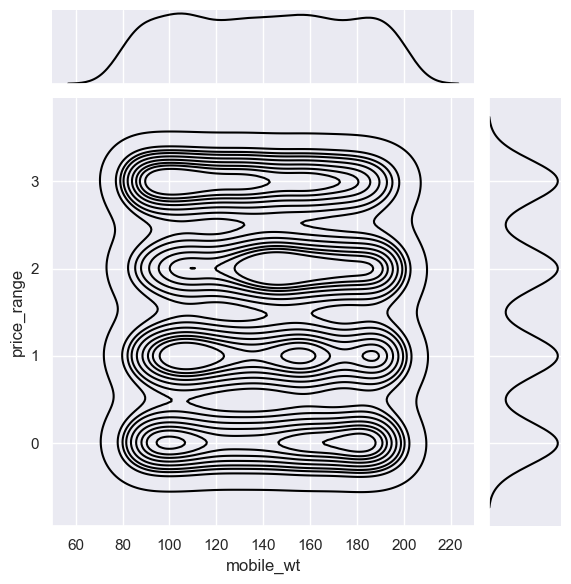

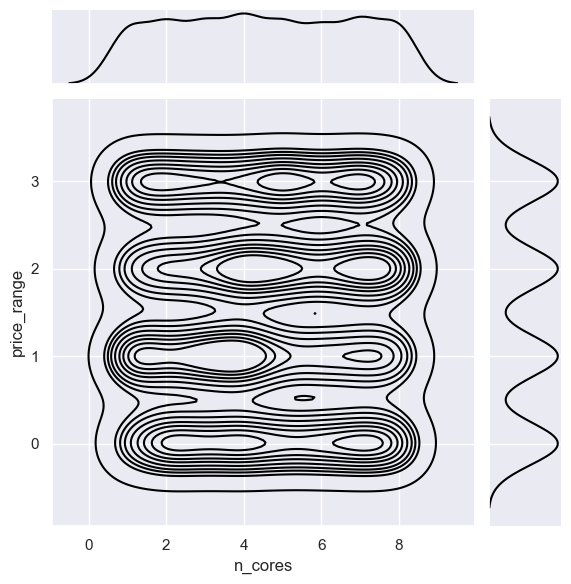

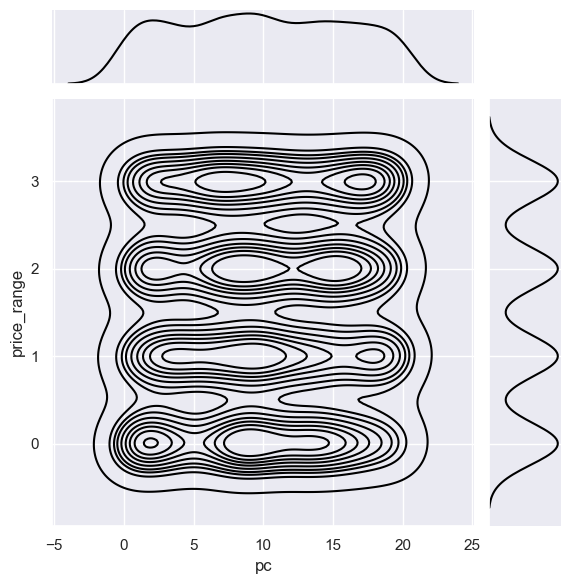

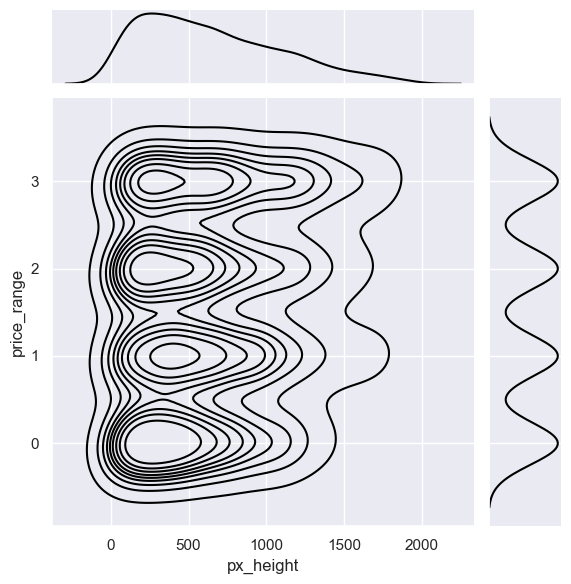

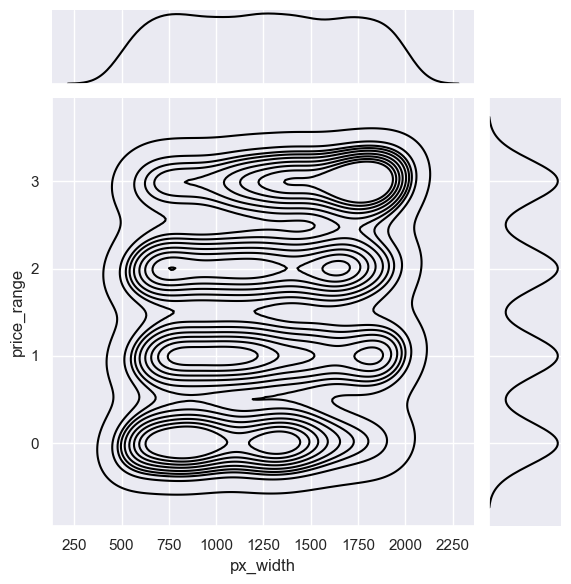

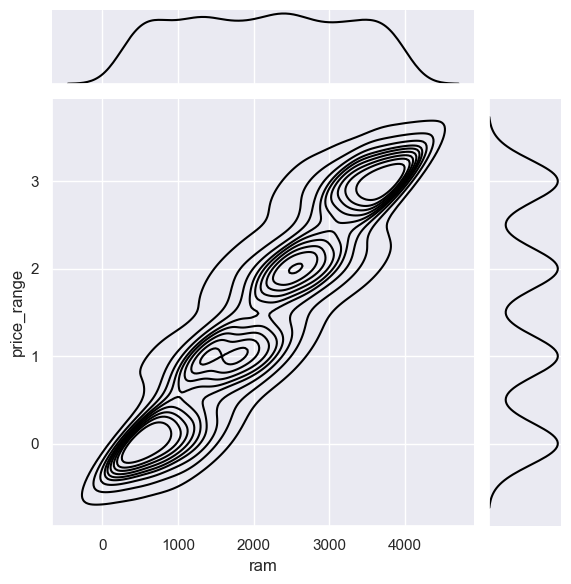

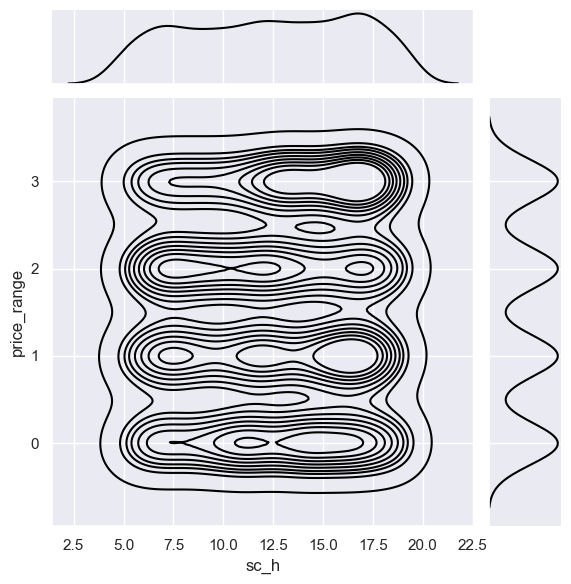

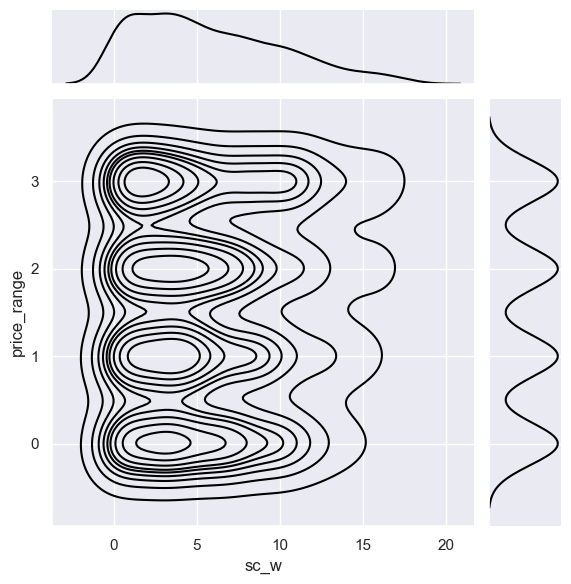

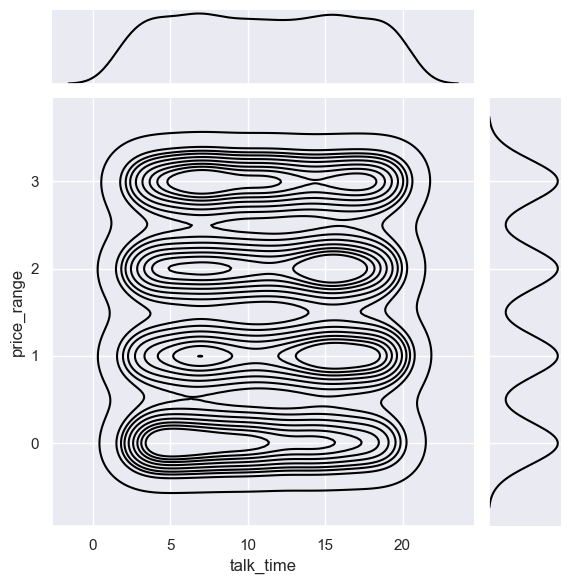

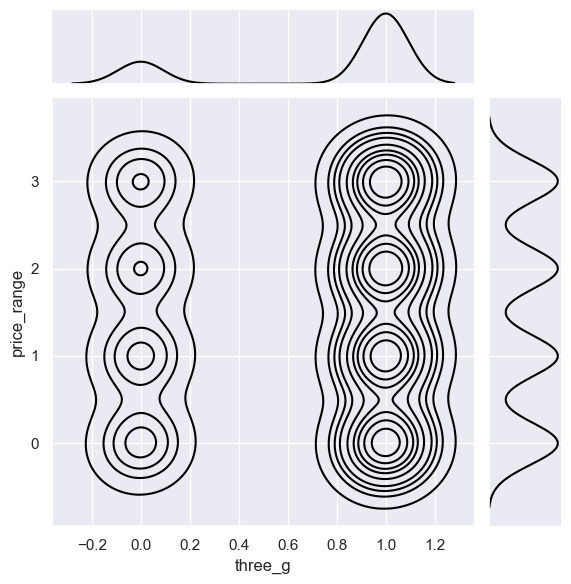

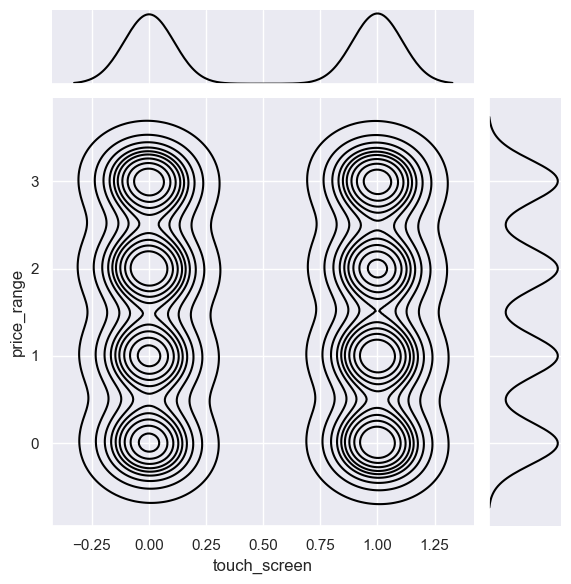

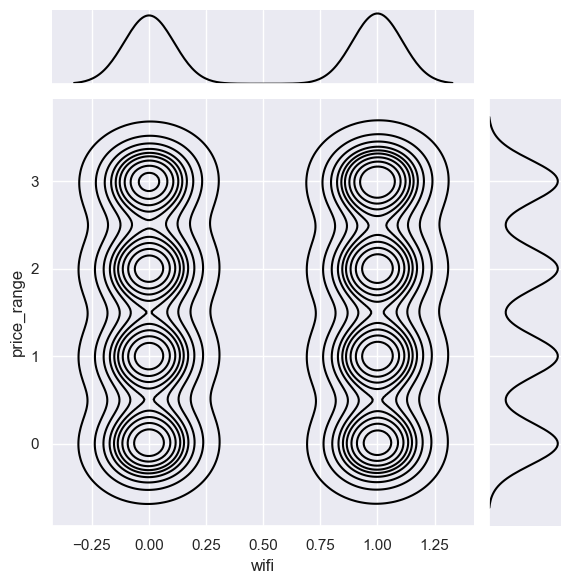

In [359]:
num_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

fig, axes = plt.subplots(nrows=1, ncols=len(num_columns), figsize=(20, 5))

for i, c in enumerate(num_columns):
    sns.jointplot(x=c, y='price_range', data=train, kind='kde', palette="dict", color='black', ax=axes[i])
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('price_range')

plt.show()

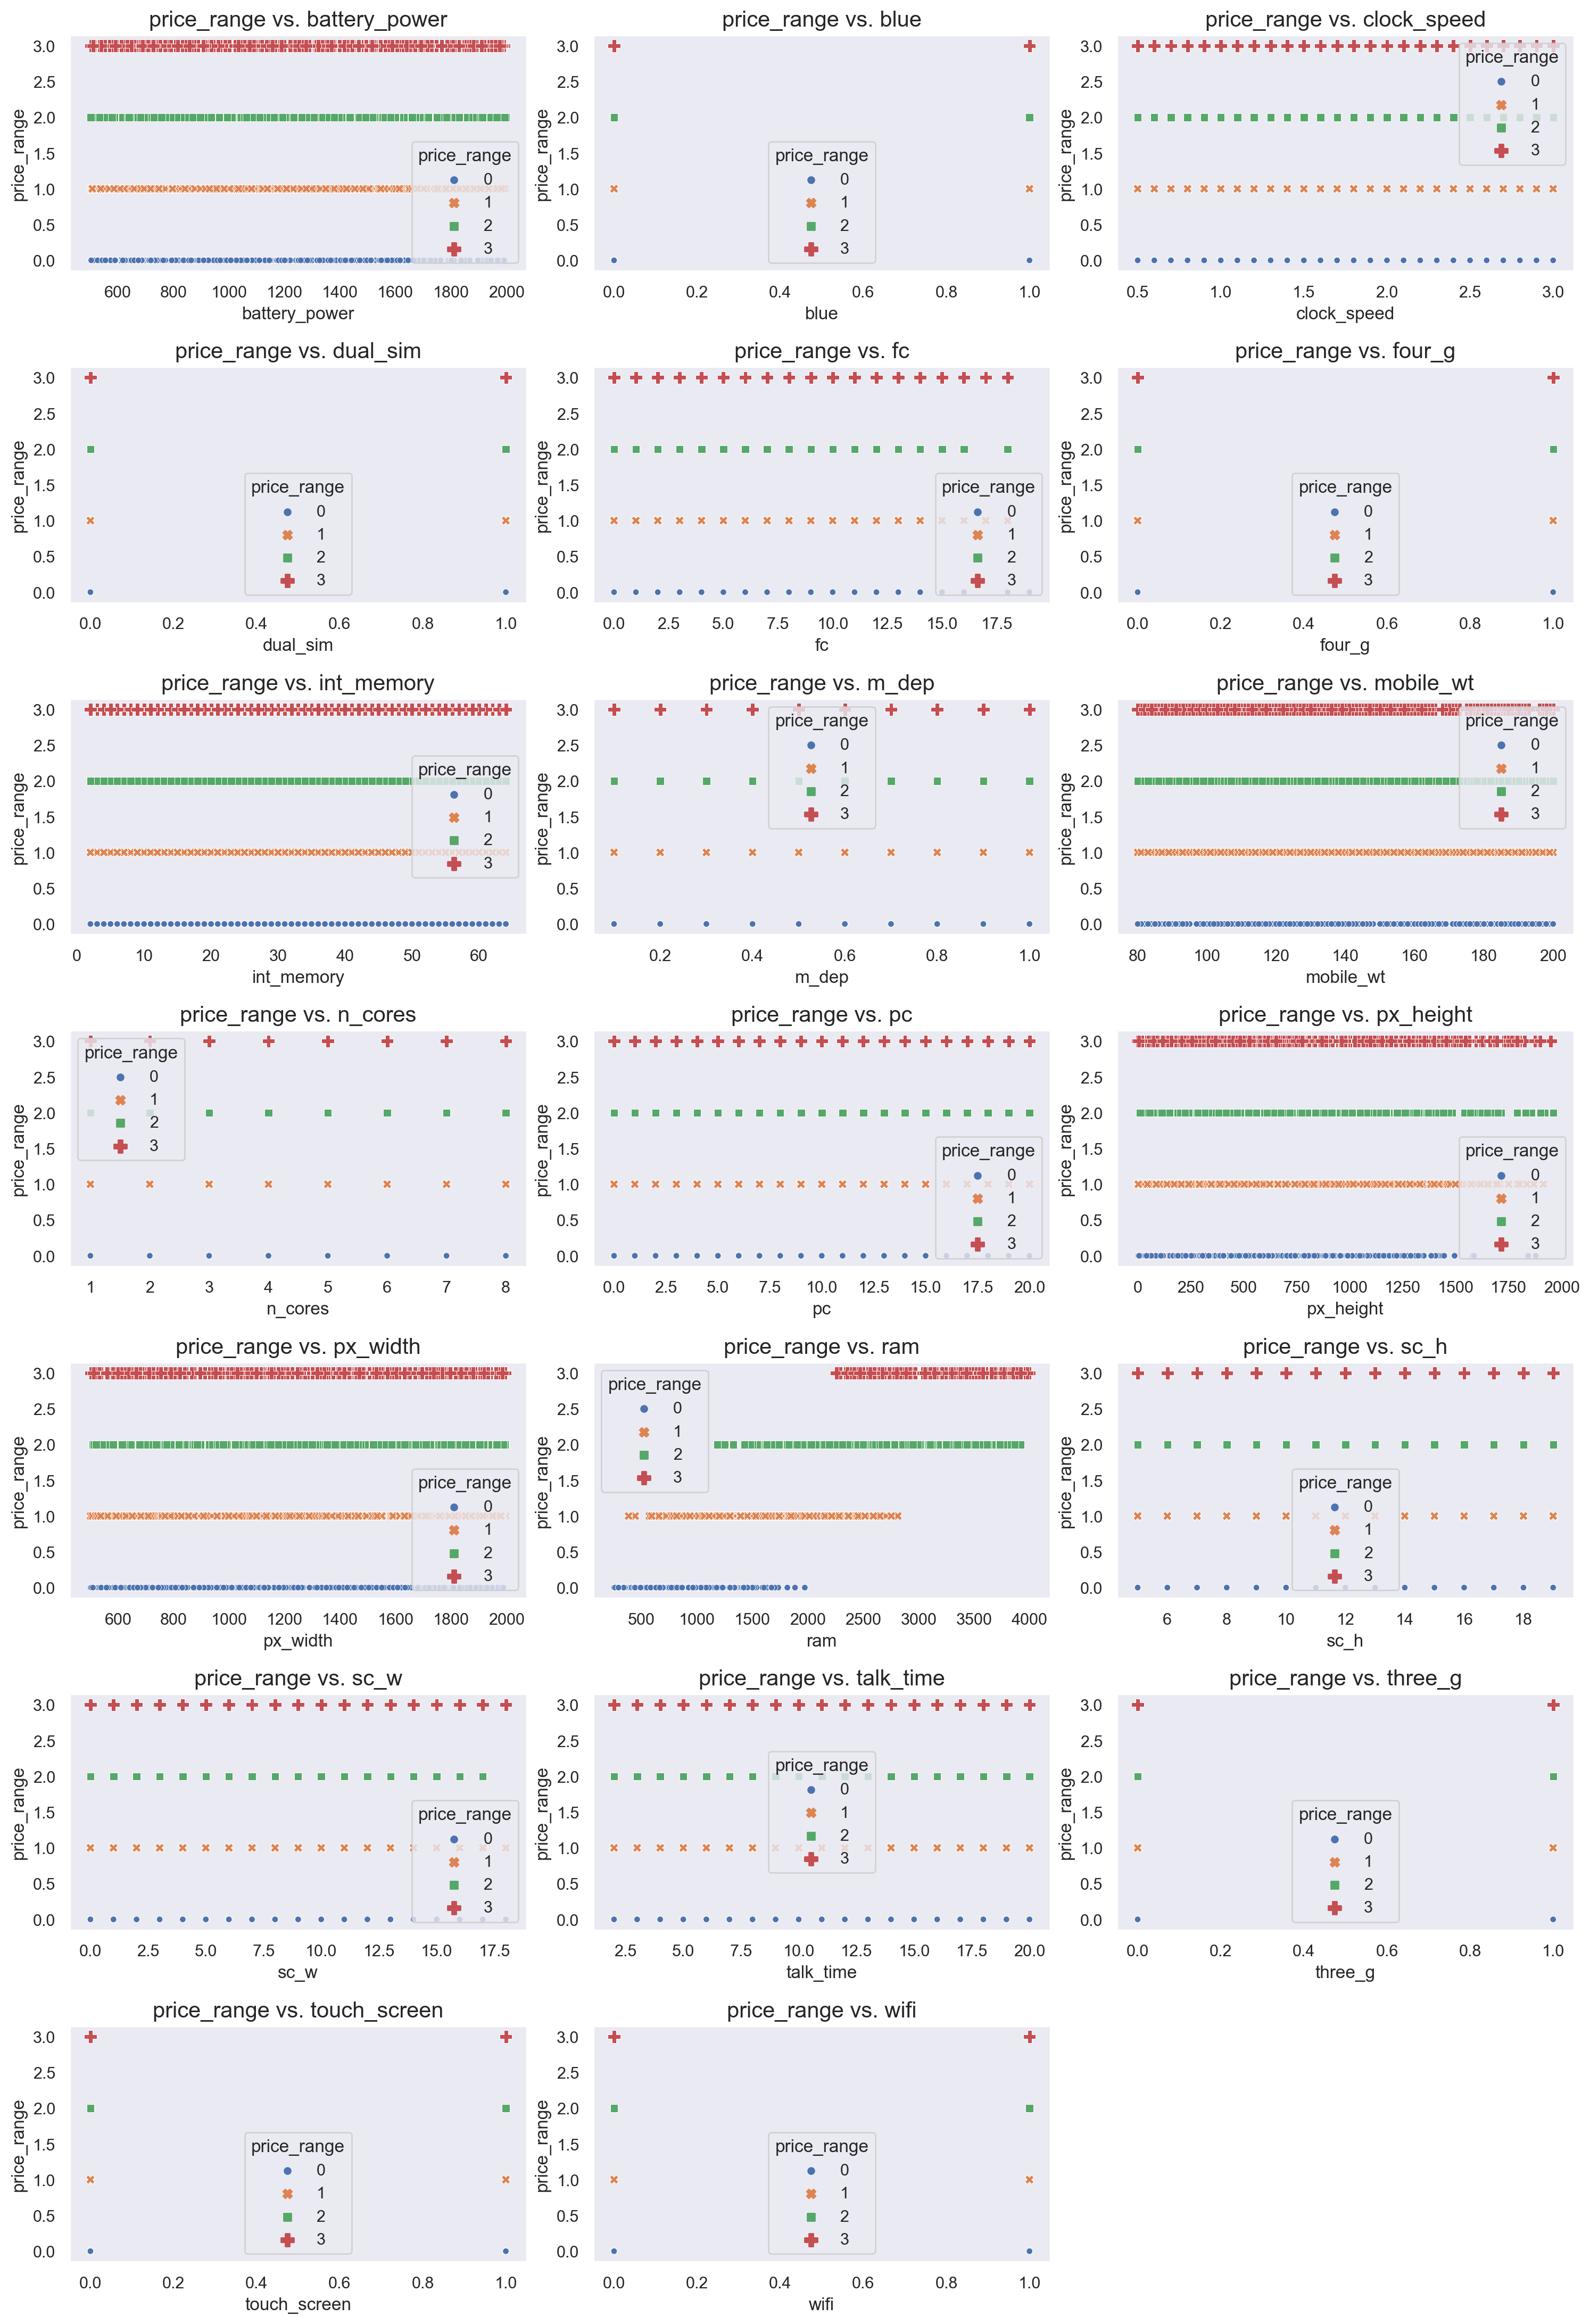

In [360]:
target = 'price_range'
features = train.columns.drop(target)
colors = ['#a9f943', '#ed67cd', '#23bf00','#5687da']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=7 ,ncols=3, figsize=(15,22), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=train, x=features[i], y=target,hue=target, ax=ax[x,y],style=target,palette="deep",size=target)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[6, 2].axis('off')

plt.tight_layout()
plt.show()

In [361]:
print('Train')
print('px_height: ',len(train[(train['px_height']<217)]))
print('px_width: ',len(train[(train['px_width']<220)]))
print('\nTest')
print('px_height: ',len(test[(test['px_height']<217)]))
print('px_width: ',len(test[(test['px_width']<220)]))

Train
px_height:  386
px_width:  0

Test
px_height:  211
px_width:  0


In [362]:
print('Train')
print('px_height: ',len(train[(train['sc_w']<2.5)]))
print('px_width: ',len(train[(train['sc_h']<5)]))
print('\nTest')
print('px_height: ',len(test[(test['sc_w']<2.5)]))
print('px_width: ',len(test[(test['sc_h']<5)]))

Train
px_height:  546
px_width:  0

Test
px_height:  318
px_width:  0


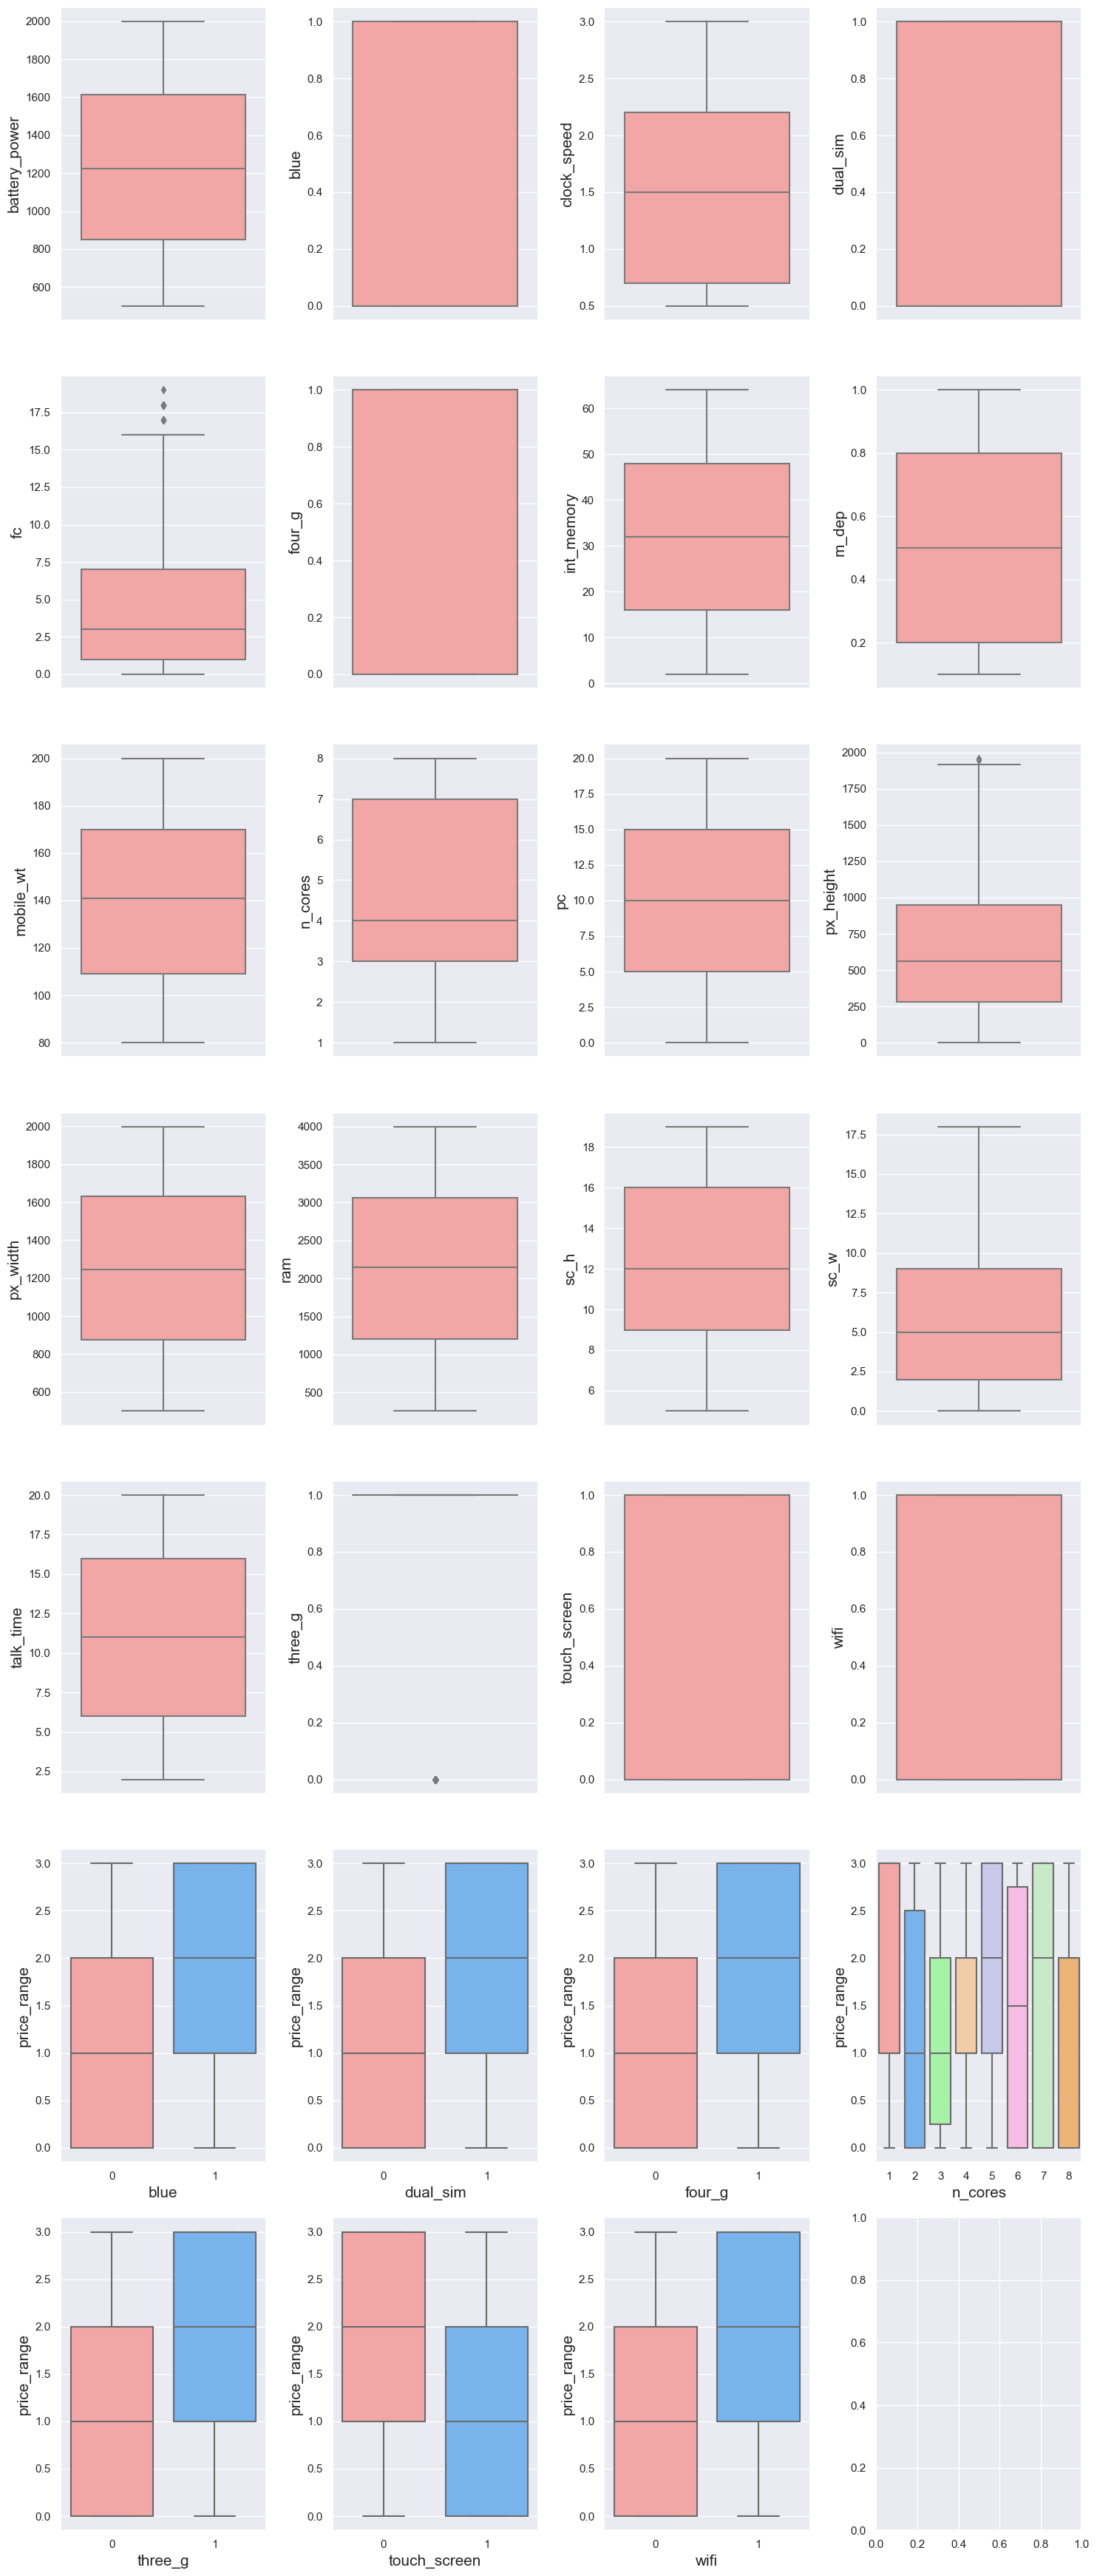

In [363]:
sns.set_style('darkgrid')
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = np.concatenate([num_columns, cat_columns])

num_features = len(OrderedCols)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), dpi=100)

for i, col in enumerate(OrderedCols):
    x = i // num_cols
    y = i % num_cols
    if i < num_features:
        if i < len(num_columns):
            sns.boxplot(data=train, y=col, ax=ax[x, y])
            ax[x, y].yaxis.label.set_size(15)
        else:
            sns.boxplot(data=train, x=col, y='price_range', ax=ax[x, y])
            ax[x, y].xaxis.label.set_size(15)
            ax[x, y].yaxis.label.set_size(15)
plt.tight_layout()
plt.show()

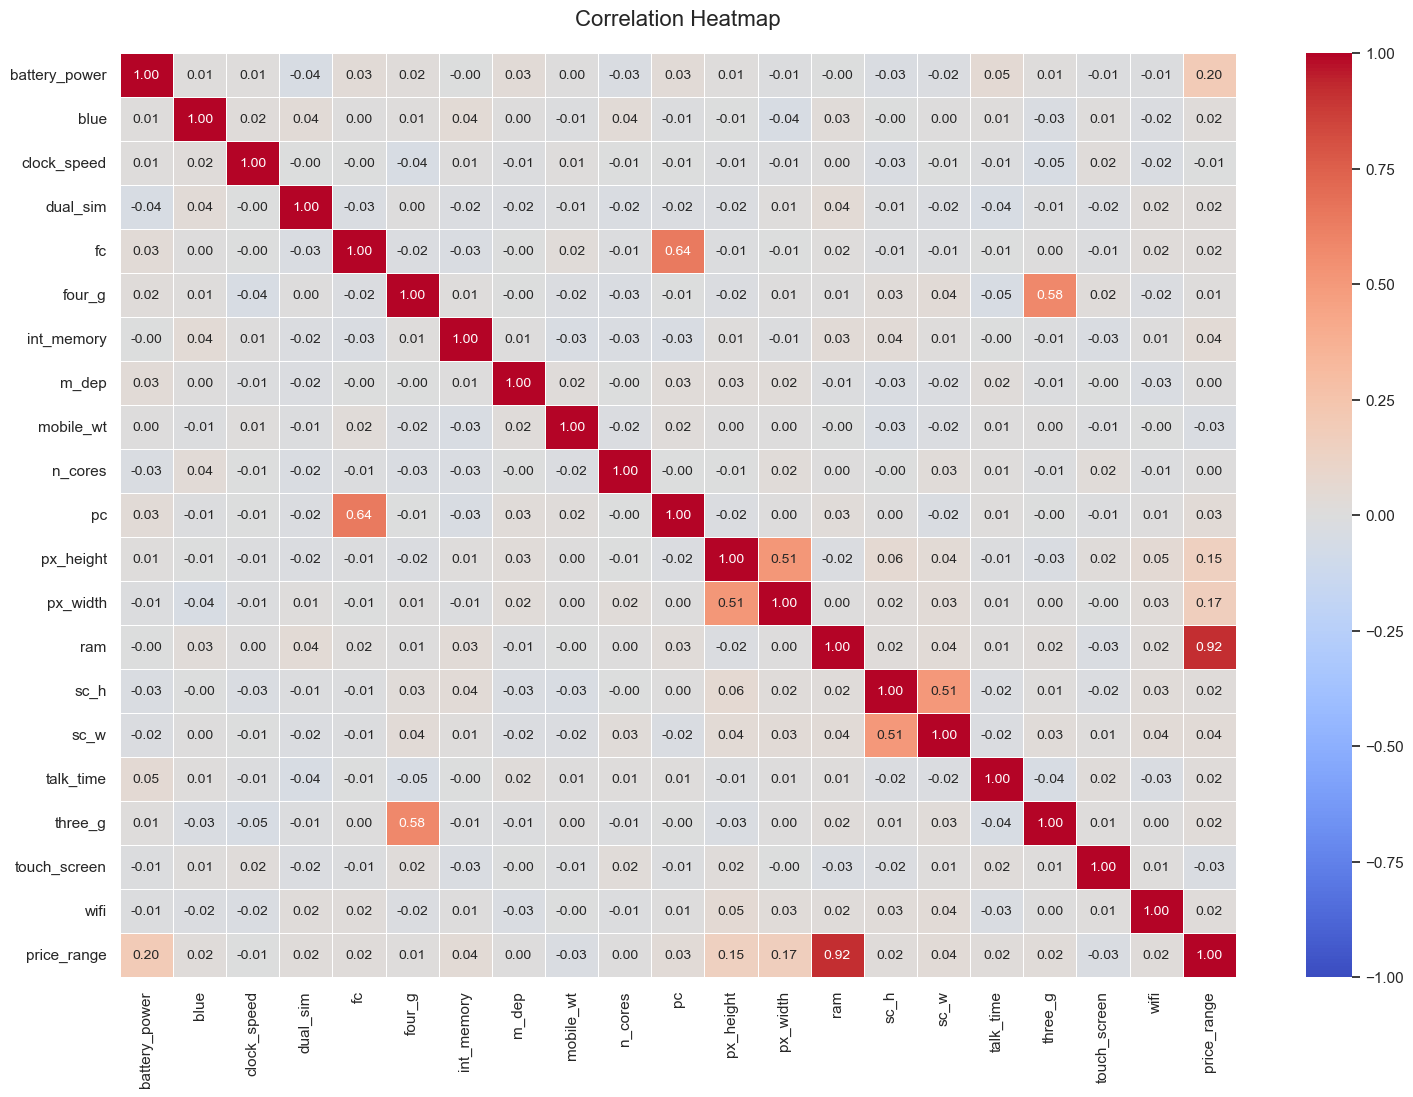

In [364]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

heatmap = sns.heatmap(
    train.corr(), vmin=-1,
    vmax=1, cmap='coolwarm',
    annot=True, linewidths=0.5,
    fmt=".2f", annot_kws={"size": 10},)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=20)
plt.yticks(rotation=0)
plt.show()

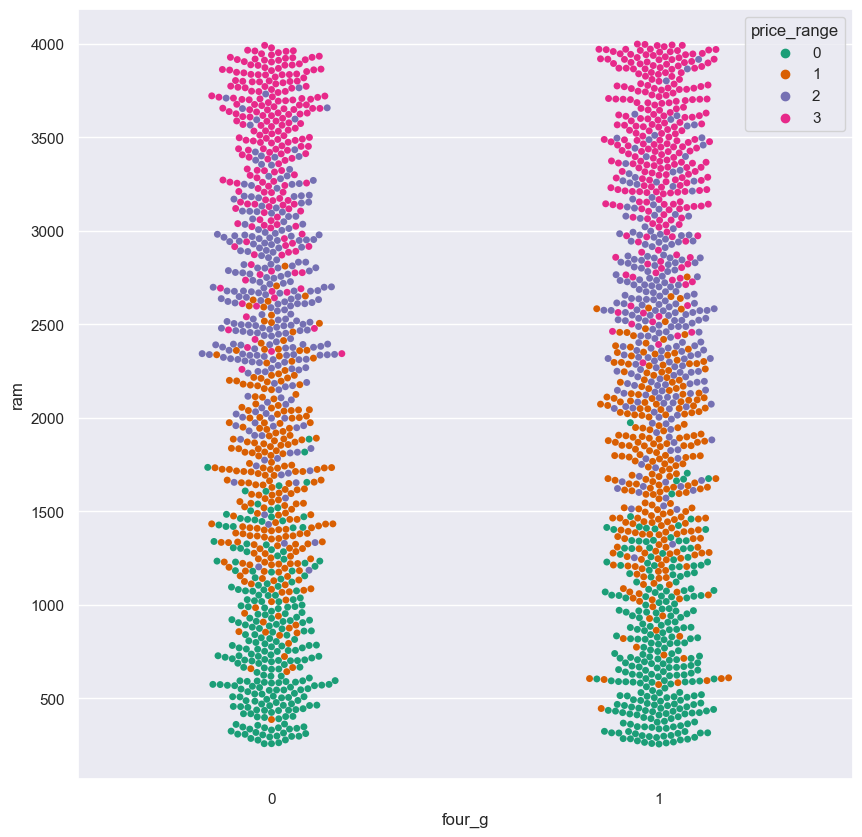

In [365]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range", palette="Dark2", data=train)
ax=sns.set(style="darkgrid")

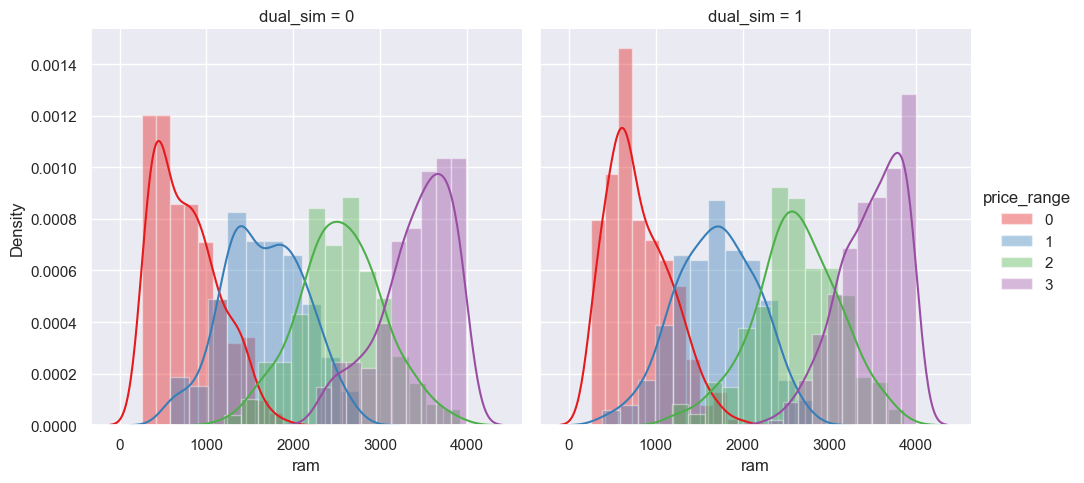

In [366]:
# DUAL SIM- RAM AND PRICE RANGE¶
# Following distibution plots show dual sim or not and ram values according to price range.
# 0- has not dual , 1- has wifi

g = sns.FacetGrid(train, col="dual_sim", hue="price_range", palette="Set1",height=5)                 
g = (g.map(sns.distplot, "ram").add_legend())

# Preprocessing Data

In [367]:
train['px_height'].replace(train['px_height'][(train['px_height']<217)].values,217,inplace=True)
test['px_height'].replace(test['px_height'][(test['px_height']<217)].values,217,inplace=True)

In [368]:
train['sc_w'].replace(train['sc_w'][(train['sc_w']<2.5)].values,2.5,inplace=True)
test['sc_w'].replace(test['sc_w'][(test['sc_w']<2.5)].values,2.5,inplace=True)

In [369]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [370]:
test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [371]:
train.drop_duplicates(inplace=True)
train.shape

(2000, 21)

In [372]:
test.drop_duplicates(inplace=True)
test.shape

(1000, 20)

In [373]:
for i in train.columns:
    print(i,end=': ')
    print('\n',train[i].unique())
    print()

battery_power: 
 [ 842 1021  563 ... 1139 1467  858]

blue: 
 [0 1]

clock_speed: 
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

dual_sim: 
 [0 1]

fc: 
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

four_g: 
 [0 1]

int_memory: 
 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

m_dep: 
 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

mobile_wt: 
 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 

In [374]:
from sklearn.preprocessing import StandardScaler

# Modelling

In [375]:
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...        217       756  2549     9   7.0         19   
1        136        3  ...        905      1988  2631    17   3.0          7   
2        145        5  ...       1263      1716  2603    11   2.5          9   
3        131        6  ...       1216      1786  2769    16   8.0         11   
4        141        2  ...       1208      1212  1411     8   2.5         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [376]:
X = train.drop('price_range',axis=1)
Y = train['price_range']

In [377]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [378]:
X_scaled_df.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.060346 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.571653  1.704465   
2    0.493546  1.381165   0.134244  0.209639 -0.645989   1.420861  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.309373  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  0.673534   1.290396 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.391703 -0.784983  0.208017   1.462493 -1.786861     -1.006018  0.986097  
1  0.467317  1.114266 -0.817330  -0.734267  0.559641      0.994018 -1.014099  
2  0.441498 -0.310171 -0.945498  -0.368140  0.559641      0.994018 -1.014099  
3  0.594569  0.876859  0.464354  -0.002014  0.559641     -1.006018 -1.014099  
4 -0.657666 -1.022389 -0.945498   0.730240  0.559641      0.994018 -1.014099

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,Y, test_size=0.2, random_state=0)

In [380]:
X_train.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
582       -0.014838 -0.990050     1.688833  0.981177 -0.762495  0.957886   
159        1.369156 -0.990050    -1.253064  0.981177  1.771858 -1.043966   
1827       1.032262 -0.990050     0.708200 -1.019184 -0.071307  0.957886   
318       -1.662883 -0.990050    -0.885327 -1.019184  0.619880  0.957886   
708       -0.595296  1.010051     1.566254  0.981177 -0.532099 -1.043966   

      int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
582    -0.443549 -0.699686   0.812386  0.209639  1.168355  -0.718765   
159     0.107683  0.687548   0.049476 -1.539175  1.003414  -0.837370   
1827   -1.656260  1.381165  -0.967737 -1.539175  1.168355   2.929512   
318     0.548669 -0.699686  -1.306808 -1.539175 -0.316108  -1.060346   
708     0.162806  0.340740   0.699362 -1.101971  0.838474   1.987791   

      px_width       ram      sc_h      sc_w  talk_time   three_g  \
582  -1.024125 -0.799672  0.876859  0.977028   0.913303  0.559641   
159   0.679219 -0.964731 -1.022389 -0.945498  -0.185077 -1.786861   
1827  1.510061  1.525908 -0.784983 -0.817330  -0.734267  0.559641   
318  -1.607335 -1.347410  0.164641  1.489701  -0.734267  0.559641   
708   1.412860  1.465970  1.589078 -0.817330  -0.185077 -1.786861   

      touch_screen      wifi  
582      -1.006018 -1.014099  
159      -1.006018 -1.014099  
1827      0.994018  0.986097  
318      -1.006018 -1.014099  
708       0.994018  0.986097

In [381]:
y_train.head()

582     0
159     1
1827    3
318     0
708     3
Name: price_range, dtype: int64

## Decision Tree Classifer

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [239]:
dt_classifier = DecisionTreeClassifier(random_state=0)

In [240]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [241]:
y_pred = dt_classifier.predict(X_test)

In [242]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


In [243]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.81      0.72      0.76        92
           2       0.75      0.79      0.77        99
           3       0.90      0.91      0.91       114

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [244]:
# Confusion Matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 90   5   0   0]
 [ 10  66  16   0]
 [  0  10  78  11]
 [  0   0  10 104]]


In [245]:
# Cross-validation scores (optional)
cv_scores = cross_val_score(dt_classifier, X, Y, cv=5)
print(f'\nCross-validation Scores: {cv_scores}')


Cross-validation Scores: [0.835  0.8175 0.8175 0.83   0.82  ]


In [246]:
from sklearn.tree import export_graphviz
import graphviz

In [247]:
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=X.columns, class_names=['0', '1', '2', '3'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view("decision_tree")

'decision_tree.pdf'

In [302]:
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

dt_classifier = DecisionTreeClassifier(random_state=0)

dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

best_dt_params = dt_grid_search.best_params_

dt_classifier_best = DecisionTreeClassifier(**best_dt_params, random_state=0)
dt_classifier_best.fit(X_train, y_train)

y_pred_dt_best = dt_classifier_best.predict(X_test)
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print("Best Decision Tree Accuracy:", accuracy_dt_best)
print("Best Decision Tree Parameters:", best_dt_params)

Best Decision Tree Accuracy: 0.8575
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


## Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [249]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [250]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [251]:
y_pred = rf_classifier.predict(X_test)

In [252]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [253]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.80      0.80      0.80        92
           2       0.81      0.74      0.77        99
           3       0.92      0.96      0.94       114

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [254]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 93   2   0   0]
 [  6  74  12   0]
 [  0  16  73  10]
 [  0   0   5 109]]


In [255]:
cv_scores = cross_val_score(rf_classifier, X, Y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.87   0.8725 0.9    0.8725 0.87  ]
Mean CV Score: 0.877


In [303]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

rf_classifier = RandomForestClassifier(random_state=0)

rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_

rf_classifier_best = RandomForestClassifier(**best_rf_params, random_state=0)
rf_classifier_best.fit(X_train, y_train)

y_pred_rf_best = rf_classifier_best.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Best Random Forest Accuracy:", accuracy_rf_best)
print("Best Random Forest Parameters:", best_rf_params)

Best Random Forest Accuracy: 0.8625
Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## Naive Bayes

In [382]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [383]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [384]:
y_pred_nb = nb_model.predict(X_test)

In [385]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.8375


In [386]:
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.76      0.75      0.75        92
           2       0.72      0.72      0.72        99
           3       0.90      0.93      0.91       114

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



In [387]:
param_grid = {'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],}

nb_model = GaussianNB()

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_nb_model = grid_search.best_estimator_
y_pred_nb_tuned = best_nb_model.predict(X_test)

accuracy_nb_tuned = accuracy_score(y_test, y_pred_nb_tuned)
print("Tuned Naive Bayes Accuracy:", accuracy_nb_tuned)

print("Classification Report:\n", classification_report(y_test, y_pred_nb_tuned))

Best Hyperparameters: {'priors': None}
Tuned Naive Bayes Accuracy: 0.8375
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.76      0.75      0.75        92
           2       0.72      0.72      0.72        99
           3       0.90      0.93      0.91       114

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



## Neural Network Classifier

In [281]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

In [282]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

In [283]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [284]:
scaler = StandardScaler()
X_train_tensor = torch.tensor(scaler.fit_transform(X_train.values), dtype=torch.float32)
X_test_tensor = torch.tensor(scaler.transform(X_test.values), dtype=torch.float32)

In [285]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [286]:
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(torch.unique(y_train_tensor))

In [287]:
model = SimpleNN(input_size, hidden_size, output_size)

In [288]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [289]:
num_epochs = 10
batch_size = 64

In [290]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [291]:
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

In [292]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

In [293]:
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 83.75%


In [294]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [296]:
predicted_np = predicted.numpy()

In [297]:
y_test_np = y_test_tensor.numpy()
print("Classification Report:\n", classification_report(y_test_np, predicted_np))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        95
           1       0.84      0.71      0.77        92
           2       0.75      0.79      0.77        99
           3       0.89      0.89      0.89       114

    accuracy                           0.84       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



In [298]:
conf_matrix = confusion_matrix(y_test_np, predicted_np)

In [299]:
def plot_confusion_matrix(cm, classes):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [300]:
class_names = np.unique(y_test_np)

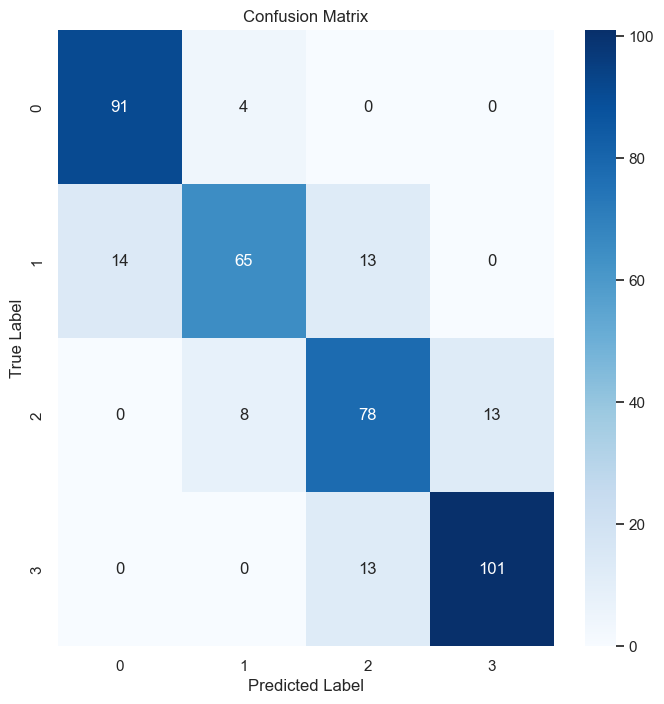

In [334]:
plot_confusion_matrix(conf_matrix, classes=class_names)

In [335]:
from sklearn.base import BaseEstimator, ClassifierMixin
import torch.nn.functional as F

In [336]:
class SimpleNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, output_size, hidden_size=128, lr=0.001, num_epochs=10, batch_size=64):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.model = SimpleNN(input_size, hidden_size, output_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        for epoch in range(self.num_epochs):
            for batch_X, batch_y in train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = F.cross_entropy(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
        
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            _, predicted = torch.max(outputs, 1)
        return predicted

In [337]:
param_grid = {
    'hidden_size': [64, 128, 256],
    'lr': [0.001, 0.01, 0.1],
    'num_epochs': [5, 10, 15],
    'batch_size': [32, 64, 128]}

In [338]:
nn_wrapper = SimpleNNWrapper(input_size, output_size)

In [339]:
grid_search = GridSearchCV(
    nn_wrapper,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    refit=False,
    return_train_score=True,
)

In [340]:
grid_search.fit(X_train_tensor, y_train_tensor)
print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters:  {'batch_size': 32, 'hidden_size': 64, 'lr': 0.001, 'num_epochs': 5}


In [341]:
best_model_index = grid_search.best_index_
best_model_info = grid_search.cv_results_['params'][best_model_index]
best_model = SimpleNNWrapper(input_size, output_size, **best_model_info)
best_model.fit(X_train_tensor, y_train_tensor)

SimpleNNWrapper(batch_size=32, hidden_size=64, input_size=20, num_epochs=5,
                output_size=4)

In [342]:
predicted = best_model.predict(X_test_tensor)
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
print(f'Test Accuracy with Best Model: {accuracy * 100:.2f}%')

Test Accuracy with Best Model: 77.00%
